### Luisa's original calculation

In [ ]:
import oqupy
import numpy as np
import matplotlib.pyplot as plt

: 

In [2]:
oqupy.__version__

'0.4.0'

In [3]:
ρ_00 = np.array([[0. + 0*1j for _ in range(4)] for _ in range(4)])
ρ_11 = np.array([[0. + 0*1j for _ in range(4)] for _ in range(4)])
ρ_22 = np.array([[0. + 0*1j for _ in range(4)] for _ in range(4)])
ρ_33 = np.array([[0. + 0*1j for _ in range(4)] for _ in range(4)])
ρ_01 = np.array([[0. + 0*1j for _ in range(4)] for _ in range(4)])
ρ_02 = np.array([[0. + 0*1j for _ in range(4)] for _ in range(4)])
ρ_03 = np.array([[0. + 0*1j for _ in range(4)] for _ in range(4)])
ρ_12 = np.array([[0. + 0*1j for _ in range(4)] for _ in range(4)])
ρ_13 = np.array([[0. + 0*1j for _ in range(4)] for _ in range(4)])
ρ_23 = np.array([[0. + 0*1j for _ in range(4)] for _ in range(4)])

ρ_00[0][0] = 1 + 0*1j
ρ_11[1][1] = 1 + 0*1j
ρ_22[2][2] = 1 + 0*1j
ρ_33[3][3] = 1 + 0*1j

ρ_01[0][1] = 1 + 0*1j
ρ_02[0][2] = 1 + 0*1j
ρ_03[0][3] = 1 + 0*1j

ρ_12[1][2] = 1 + 0*1j
ρ_13[1][3] = 1 + 0*1j
ρ_23[2][3] = 1 + 0*1j


sminus_u = np.transpose(ρ_01)
splus_u = ρ_01
sminus_g = np.transpose(ρ_23)
splus_g = ρ_23

In [4]:
kb = 0.131
w_c = 2*np.pi #ω_c
alpha1 = 0.0275 # A of J(ω)
alpha2 = 0.073 

λ_u = 1.68
λ_g = 0.282
temperature = 20*kb
a1 = 0.5/(0.5*(2+ np.exp(-λ_u/(temperature)) +np.exp(-λ_g/(temperature))))
a3 = 0.5/(0.5*(2+ np.exp(-λ_u/(temperature)) +np.exp(-λ_g/(temperature))))
a0 = a1*np.exp(-λ_u/(temperature))
a2 = a3*np.exp(-λ_g/(temperature))

print(a0+a1+a2+a3)
print(-λ_u/(kb*np.log(a0/a1)))

#initial_state = (1/4.0) * (ρ_00 + ρ_11 + ρ_22 + ρ_33)
initial_state= a0*ρ_00 +  a1*ρ_11 +a2* ρ_22 +  a3*ρ_33
#initial_state = np.matmul(np.matmul(sminus_u + sminus_g,initial_state), np.transpose(sminus_u + sminus_g))



Δ = 2.5
Ω_z = 0#2*1e-1
Ω_min = 0#02*1e-1
Ω_plus = 0#02*1e-1

dim = 3
A = alpha1
J1 = 0.0025/(4*np.pi**2)
sig = 2.4042*2*np.pi
w_0 = 9.35*2*np.pi
J0 = 0.0235/(2*np.pi)
Gam = 0.8414*2*np.pi
w_loc = 15.19*2*np.pi
ϵ = np.sqrt(0.0037/(2 * A * w_c**(1-dim)))



1.0
20.0


In [15]:
correlations = oqupy.PowerLawSD(alpha=A,
                                zeta=dim,
                                cutoff=w_c,
                                cutoff_type='exponential',
                                temperature=temperature)

OpPhon = (ρ_01 + ρ_23) + np.transpose(ρ_01 + ρ_23)
OpsDef = ρ_00 + ρ_11 - ρ_22 - ρ_33
bath = oqupy.Bath(ϵ*OpPhon + 0*OpsDef, correlations)#bath = oqupy.Bath(ϵ*OpPhon + OpsDef, correlations)
tempo_parameters = oqupy.TempoParameters(dt=0.015, dkmax=50, epsrel=10**(-9))

def hamiltonian_t(t): 
    return 0.5*np.array([[-Δ + λ_u, 0, Ω_z, Ω_plus],[0, -Δ - λ_u, Ω_min, Ω_z],[Ω_z, Ω_min, Δ + λ_g, 0],[Ω_plus, Ω_z, 0, Δ - λ_g]])

#γs = [ lambda t: 0.0, lambda t: 0.0, lambda t: 0.0]#[ lambda t: 0.001, lambda t: 0.001, lambda t: 0.001]
#Ophot = [lambda t: np.transpose(ρ_12), lambda t: np.transpose(ρ_03), lambda t: np.transpose(ρ_02) + np.transpose(ρ_13)]

#system = oqupy.TimeDependentSystem(hamiltonian=hamiltonian_t)#, gammas=γs, lindblad_operators=Ophot)

system=oqupy.System(hamiltonian=hamiltonian_t(0))#,gammas=list(map(lambda x: x(0),γs)), lindblad_operators=list(map(lambda x: x(0),Ophot)))
sivtmpo=oqupy.Tempo(system=system,bath=bath,parameters=tempo_parameters,
              initial_state=initial_state,
              start_time=0.0)
              

/home/luisa/.local/lib/python3.10/site-packages/oqupy/helpers.py:113: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


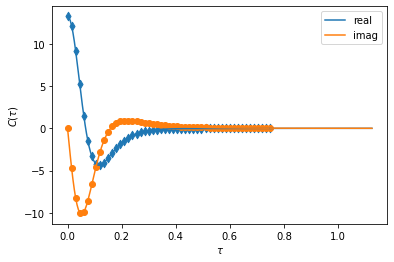

In [16]:
oqupy.helpers.plot_correlations_with_parameters(correlations,tempo_parameters)
plt.show()

In [17]:
sivtmpo.compute(end_time=0.5)

--> TEMPO computation:
100.0%   33 of   33 [########################################] 00:03:57
Elapsed time: 237.3s


In [18]:
dyn = sivtmpo.get_dynamics()

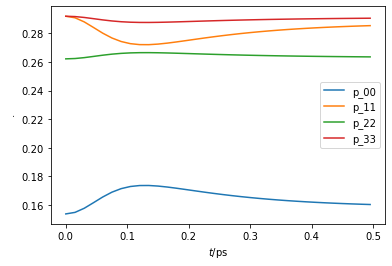

In [19]:
plt.plot(dyn.times,dyn.states[:,0,0].real, label="p_00")
plt.plot(dyn.times,dyn.states[:,1,1].real, label="p_11")
plt.plot(dyn.times,dyn.states[:,2,2].real, label="p_22")
plt.plot(dyn.times,dyn.states[:,3,3].real, label="p_33")

#plt.plot(t, (ρ_00 + ρ_11 + ρ_22 + ρ_33), label="sum")
#plt.plot(t, p_10.imag, label=r"$\Delta = $"+f"{delta:0.1f}")
plt.xlabel(r'$t/$ps')
plt.ylabel(r'$ . $')
#plt.ylim((0.0,1.0))
plt.legend()
plt.show()

In [20]:
#temperature at intial time
print(-λ_u/(kb*np.log(dyn.states[0,0,0].real/dyn.states[0,1,1].real)))
print(-λ_g/(kb*np.log(dyn.states[0,2,2].real/dyn.states[0,3,3].real)))

20.0
19.999999999999993


In [21]:
#temperature at final time
print(-λ_u/(kb*np.log(dyn.states[-1,0,0].real/dyn.states[-1,1,1].real)))
print(-λ_g/(kb*np.log(dyn.states[-1,2,2].real/dyn.states[-1,3,3].real)))

22.241774394155275
22.043924574057446


In [22]:
print(dyn.states[0,0,0].real + dyn.states[0,1,1].real)
print(dyn.states[0,2,2].real +dyn.states[0,3,3].real)
print(dyn.states[0,0,0].real + dyn.states[0,1,1].real + dyn.states[0,2,2].real +dyn.states[0,3,3].real)

0.44578824067344636
0.5542117593265538
1.0


In [23]:
print(dyn.states[-1,0,0].real + dyn.states[-1,1,1].real)
print(dyn.states[-1,2,2].real + dyn.states[-1,3,3].real)
print(dyn.states[-1,0,0].real + dyn.states[-1,1,1].real + dyn.states[-1,2,2].real + dyn.states[-1,3,3].real)

0.44578824119905464
0.5542117478476848
0.9999999890467394


In [14]:
print(dyn.states[-1,0,0].real + dyn.states[-1,1,1].real)
print(dyn.states[-1,2,2].real + dyn.states[-1,3,3].real)
print(dyn.states[-1,0,0].real + dyn.states[-1,1,1].real + dyn.states[-1,2,2].real + dyn.states[-1,3,3].real)

0.4457860404415688
0.5542119707006242
0.999998011142193
